In [1]:
# read the csv file
import pandas as pd
import numpy as np
df = pd.read_csv("objective_issues.csv")
df = df.replace('nan', np.nan)
df = df.dropna()

In [ ]:
%timeit
counts = df['repository_url'].value_counts().to_dict()
sorted_repo_urls = list(counts.keys())
sorted_repo_urls = sorted_repo_urls[0:100]
df_top100 = df[0:0]
for row in df.iterrows():
    if(row[1]['repository_url'] in sorted_repo_urls):
        df_top1000.loc[len(df_top1000.index)] = row[1]


In [ ]:
filepath = Path('new_dataset.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df_top100.to_csv(filepath)  

In [1]:
# read the csv file
import pandas as pd
import numpy as np
df = pd.read_csv("new_dataset.csv", encoding = "ISO-8859-1")
df = df.replace('nan', np.nan)
df = df.dropna()

In [2]:
df = df.iloc[: ,2: ]
df

,repository_url,issue_number,title_processed,body_processed,label,label_cat,test_tag,info,state,created_at,closed_at
12462,https://api.github.com/repos/dita-ot/dita-ot,1976.0,added extension points corresponding template ...,preprocess i digitreplaced postprocess,feature,feature,0.0,"{'state': 'closed', 'created_at': '2015-07-20T...",closed,2015-07-20T19:48:21Z,2015-07-20T20:17:59Z
12463,https://api.github.com/repos/vaadin/framework,4929.0,changing visibility components grid layout ins...,originally tsvk encountered weird behavior vaa...,bug,bug,0.0,"{'state': 'closed', 'created_at': '2014-02-22T...",closed,2014-02-22T19:59:02Z,2014-04-29T12:13:05Z
12464,https://api.github.com/repos/square/okhttp,2127.0,leaked connection warning actionable,print warning multiple times include stacktrace,enhancement,feature,0.0,"{'state': 'closed', 'created_at': '2015-12-17T...",closed,2015-12-17T22:01:48Z,2016-12-11T17:09:08Z
12465,https://api.github.com/repos/vaadin/framework,4909.0,pathreplaced browser zoom results aborting lay...,originally mvolery attached find demo applicat...,bug,bug,0.0,"{'state': 'closed', 'created_at': '2014-02-19T...",closed,2014-02-19T13:42:07Z,2015-06-25T06:55:02Z
12466,https://api.github.com/repos/orientechnologies...,6763.0,temporary vertices persisted graph saving,orient database version operating system hardw...,question,support,0.0,"{'state': 'closed', 'created_at': '2016-09-30T...",closed,2016-09-30T14:19:17Z,2016-09-30T20:59:05Z
...,...,...,...,...,...,...,...,...,...,...,...
144617,https://api.github.com/repos/cdapio/cdap,8494.0,cda digitreplaced remove unnecessary logging t...,not running build affect logging,bug,bug,0.0,"{'state': 'closed', 'created_at': '2017-04-06T...",closed,2017-04-06T01:22:55Z,2017-04-06T04:02:56Z
144618,https://api.github.com/repos/cdapio/cdap,9246.0,cda digitreplaced fixes pipeline metrics fetch...,fetch metrics pipeline filter node name values...,bug,bug,0.0,"{'state': 'closed', 'created_at': '2017-07-14T...",closed,2017-07-14T01:34:11Z,2017-07-15T00:03:54Z
144619,https://api.github.com/repos/MinecraftForge/Mi...,2155.0,fix silk harvest blockstate air tested,testing block state block silk harvest functio...,bug,bug,0.0,"{'state': 'closed', 'created_at': '2015-10-29T...",closed,2015-10-29T15:08:50Z,2016-05-29T03:54:56Z
144620,https://api.github.com/repos/M66B/XPrivacy,1374.0,google play breaks com google android provider...,platform android digitreplaced digitreplaced s...,question,support,0.0,"{'state': 'closed', 'created_at': '2014-02-17T...",closed,2014-02-17T18:33:50Z,2014-02-17T20:33:44Z


In [3]:
df['title_len'] = df.apply(lambda row : len(row['title_processed'].split()), axis = 1) 
df['body_len'] = df.apply(lambda row : len(row['body_processed'].split()), axis = 1) 

In [13]:
df.head(2)

,repository_url,issue_number,title_processed,body_processed,label,label_cat,test_tag,info,state,created_at,closed_at,title_len,body_len
12462,https://api.github.com/repos/dita-ot/dita-ot,1976.0,added extension points corresponding template ...,preprocess i digitreplaced postprocess,feature,feature,0.0,"{'state': 'closed', 'created_at': '2015-07-20T...",closed,2015-07-20T19:48:21Z,2015-07-20T20:17:59Z,7,4
12463,https://api.github.com/repos/vaadin/framework,4929.0,changing visibility components grid layout ins...,originally tsvk encountered weird behavior vaa...,bug,bug,0.0,"{'state': 'closed', 'created_at': '2014-02-22T...",closed,2014-02-22T19:59:02Z,2014-04-29T12:13:05Z,13,218


In [4]:
title_len_dict= {'0 - 5': 0,'5 - 10': 0, '10 - 15': 0, '15 - 20': 0,'20 +' : 0}
def calc_title_len_freq():
    for row in df.iterrows():
        if(0<=row[1]['title_len'] <5):
            title_len_dict['0 - 5']= title_len_dict['0 - 5'] +1
        if(5<=row[1]['title_len'] <10):
            title_len_dict['5 - 10']= title_len_dict['5 - 10'] +1
        if(10<=row[1]['title_len'] <15):
            title_len_dict['10 - 15']= title_len_dict['10 - 15'] +1
        if(15<=row[1]['title_len'] <20):
            title_len_dict['15 - 20']= title_len_dict['15 - 20'] +1
        if(row[1]['title_len'] >= 20):
            title_len_dict['20 +']= title_len_dict['20 +'] +1

calc_title_len_freq()
title_len_dict

{'0 - 5': 5668, '5 - 10': 14104, '10 - 15': 1996, '15 - 20': 173, '20 +': 42}

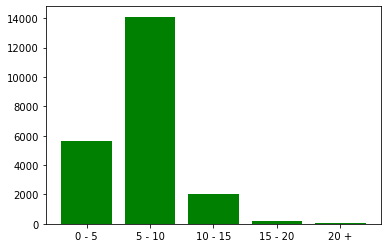

In [6]:
import matplotlib.pyplot as plt
plt.bar(list(title_len_dict.keys()), title_len_dict.values(), color='g')
plt.show()

In [18]:
body_len_dict= {'0 - 15': 0,'15 - 30': 0, '30 - 45': 0, '45 - 60': 0,'60 - 75' : 0, '75 - 90':0, '90 +':0}
def calc_body_len_freq():
    for row in df.iterrows():
        if(0<=row[1]['body_len'] <15):
            body_len_dict['0 - 15']= body_len_dict['0 - 15'] +1
        if(15<=row[1]['body_len'] <30):
            body_len_dict['15 - 30']= body_len_dict['15 - 30'] +1
        if(30<=row[1]['body_len'] <45):
            body_len_dict['30 - 45']= body_len_dict['30 - 45'] +1
        if(45<=row[1]['body_len'] <60):
            body_len_dict['45 - 60']= body_len_dict['45 - 60'] +1
        if(60<=row[1]['body_len'] <75):
            body_len_dict['60 - 75']= body_len_dict['60 - 75'] +1
        if(75<=row[1]['body_len'] <90):
            body_len_dict['75 - 90']= body_len_dict['75 - 90'] +1
        if(row[1]['body_len'] >= 90):
            body_len_dict['90 +']= body_len_dict['90 +'] +1

calc_body_len_freq()
body_len_dict

{'0 - 15': 5811,
 '15 - 30': 5427,
 '30 - 45': 3368,
 '45 - 60': 2173,
 '60 - 75': 1405,
 '75 - 90': 930,
 '90 +': 2869}

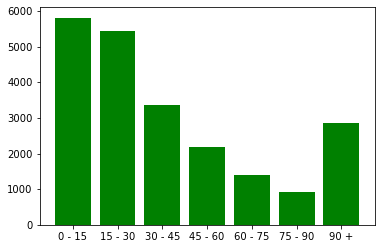

In [38]:
plt.bar(list(body_len_dict.keys()), body_len_dict.values(), color='g')
plt.show()

In [20]:
labels_freq_dict={}
unique_labels= df['label_cat'].unique()
group1= df.groupby("label_cat")
for label in unique_labels:
    label_group= group1.get_group(label)
    labels_freq_dict.update({label: len(label_group)})
labels_freq_dict

{'feature': 6222, 'bug': 11377, 'support': 4384}

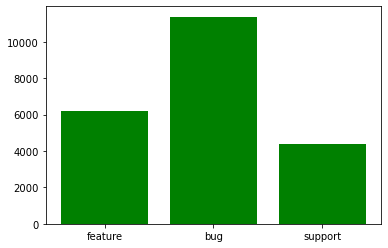

In [23]:
plt.bar(list(labels_freq_dict.keys()), labels_freq_dict.values(), color='g')
plt.show()

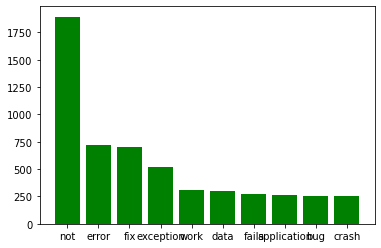

In [7]:
from nltk import FreqDist
import re
group1= df.groupby("label_cat")
bugs= group1.get_group("bug")
most_common_bugs= FreqDist(" ".join(bugs["title_processed"]).split()).most_common(100)
most_common_10_bugs=[w for w in most_common_bugs if w[0] not in re.findall(r'[\w]+replaced', w[0])][:10]
most_common_dic_bugs={}
for tup in most_common_10_bugs:
    most_common_dic_bugs.update({tup[0]:tup[1]})
plt.bar(list(most_common_dic_bugs.keys()), most_common_dic_bugs.values(), color='g')
plt.show()

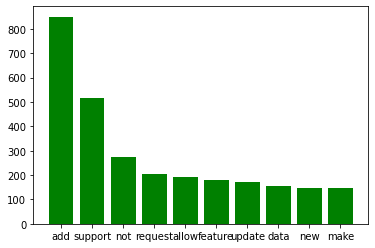

In [9]:
from nltk import FreqDist
import re
features= group1.get_group("feature")
most_common_features= FreqDist(" ".join(features["title_processed"]).split()).most_common(100)
most_common_10_features=[w for w in most_common_features if w[0] not in re.findall(r'[\w]+replaced', w[0])][:10]
most_common_dic_features={}
for tup in most_common_10_features:
    most_common_dic_features.update({tup[0]:tup[1]})
plt.bar(list(most_common_dic_features.keys()), most_common_dic_features.values(), color='g')
plt.show()

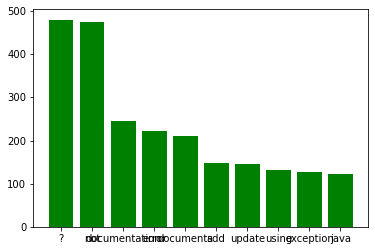

In [59]:
from nltk import FreqDist
import re
group1= df.groupby("label_cat")
supports= group1.get_group("support")
most_common_supports= FreqDist(" ".join(supports["title_processed"]).split()).most_common(100)
most_common_10_supports=[w for w in most_common_supports if w[0] not in re.findall(r'[\w]+replaced', w[0])][:10]
most_common_dic_supports={}
for tup in most_common_10_supports:
    most_common_dic_supports.update({tup[0]:tup[1]})
plt.bar(list(most_common_dic_supports.keys()), most_common_dic_supports.values(), color='g')
plt.show()

In [90]:
from datetime import datetime, timedelta
from django.utils import timezone

def calculate_date(d1,d2):
    date_format1 = datetime.fromisoformat(d1[:-1]).astimezone(timezone.utc)
    date_format2 = datetime.fromisoformat(d2[:-1]).astimezone(timezone.utc)
    day1 = (date_format1 - timedelta(days=date_format1.weekday()))
    day2 = (date_format2 - timedelta(days=date_format2.weekday()))
    return round((day2 - day1).days / 7)

df['time_in_weeks'] = df.apply(lambda row : calculate_date(row['created_at'],row['closed_at']), axis = 1) 



In [98]:
from nltk import FreqDist
import re
group1= df.groupby("label_cat")
bugs= group1.get_group("bug")
print((sum(bugs['time_in_weeks'])/len(bugs)))


16.323899094664675


In [100]:
from nltk import FreqDist
import re
group1= df.groupby("label_cat")
features= group1.get_group("feature")
print((sum(features['time_in_weeks'])/len(features)))


23.41385406621665


In [101]:
from nltk import FreqDist
import re
group1= df.groupby("label_cat")
supports= group1.get_group("support")
print((sum(supports['time_in_weeks'])/len(supports)))


10.317518248175183
